In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
from scipy.stats import linregress
from statistics import mean

In [2]:
ls

1533148642_test.csv
1533148642_train.csv
HackDay2.ipynb
My_Prediction.csv
README.md
data_description.txt*
house-prices-advanced-regression-techniques/
house-prices-advanced-regression-techniques.zip
sample_submission.csv*
sols/


In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
df_test = pd.read_csv("1533148642_test.csv")

In [5]:
df_test.shape

(1459, 80)

In [6]:
df_train = pd.read_csv("1533148642_train.csv")

In [7]:
df_train.shape

(1460, 81)

In [8]:
Trainingdatasize = df_train.shape[0]

In [9]:
Testdatasize = df_test.shape[0]

In [10]:
Trainingdatasize

1460

In [11]:
df = df_train.append(df_test)

In [12]:
df1 = df

In [13]:
#df1 = df.select_dtypes(exclude=['object'])
#df2 = df.select_dtypes(include=['object'])

In [14]:
df1.shape

(2919, 81)

In [15]:
#df = df_train

In [16]:
df1[df1.duplicated() ==  True]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold


In [17]:
df1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [18]:
df1.isnull().sum()

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
Alley           2721
BedroomAbvGr       0
                ... 
Utilities          2
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
YrSold             0
Length: 81, dtype: int64

In [19]:
for elem in df1: print(elem, '\t\t', df1[elem].isnull().sum())

1stFlrSF 		 0
2ndFlrSF 		 0
3SsnPorch 		 0
Alley 		 2721
BedroomAbvGr 		 0
BldgType 		 0
BsmtCond 		 82
BsmtExposure 		 82
BsmtFinSF1 		 1
BsmtFinSF2 		 1
BsmtFinType1 		 79
BsmtFinType2 		 80
BsmtFullBath 		 2
BsmtHalfBath 		 2
BsmtQual 		 81
BsmtUnfSF 		 1
CentralAir 		 0
Condition1 		 0
Condition2 		 0
Electrical 		 1
EnclosedPorch 		 0
ExterCond 		 0
ExterQual 		 0
Exterior1st 		 1
Exterior2nd 		 1
Fence 		 2348
FireplaceQu 		 1420
Fireplaces 		 0
Foundation 		 0
FullBath 		 0
Functional 		 2
GarageArea 		 1
GarageCars 		 1
GarageCond 		 159
GarageFinish 		 159
GarageQual 		 159
GarageType 		 157
GarageYrBlt 		 159
GrLivArea 		 0
HalfBath 		 0
Heating 		 0
HeatingQC 		 0
HouseStyle 		 0
Id 		 0
KitchenAbvGr 		 0
KitchenQual 		 1
LandContour 		 0
LandSlope 		 0
LotArea 		 0
LotConfig 		 0
LotFrontage 		 486
LotShape 		 0
LowQualFinSF 		 0
MSSubClass 		 0
MSZoning 		 4
MasVnrArea 		 23
MasVnrType 		 24
MiscFeature 		 2814
MiscVal 		 0
MoSold 		 0
Neighborhood 		 0
OpenPorchSF 		 0
Ov

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [21]:
df1.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,...,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,...,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,...,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,...,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,...,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [22]:
df1['Id'].value_counts()

2047    1
1088    1
1084    1
1082    1
1080    1
       ..
2532    1
483     1
2530    1
481     1
2049    1
Name: Id, Length: 2919, dtype: int64

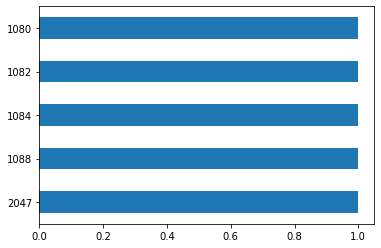

In [23]:
df1['Id'].value_counts().head().plot(kind='barh')

In [24]:
abs(df1.corr()['SalePrice'].sort_values(ascending = False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2       0.011378
BsmtHalfBath     0.016844
MiscVal          0.021190
Id               0.021917
LowQualFinSF     0.025606
YrSold           0.028923
OverallCond      0.077856
MSSubClass       0.084284
EnclosedPorch    0.128578
KitchenAbvGr     0.135907
Name: SalePr

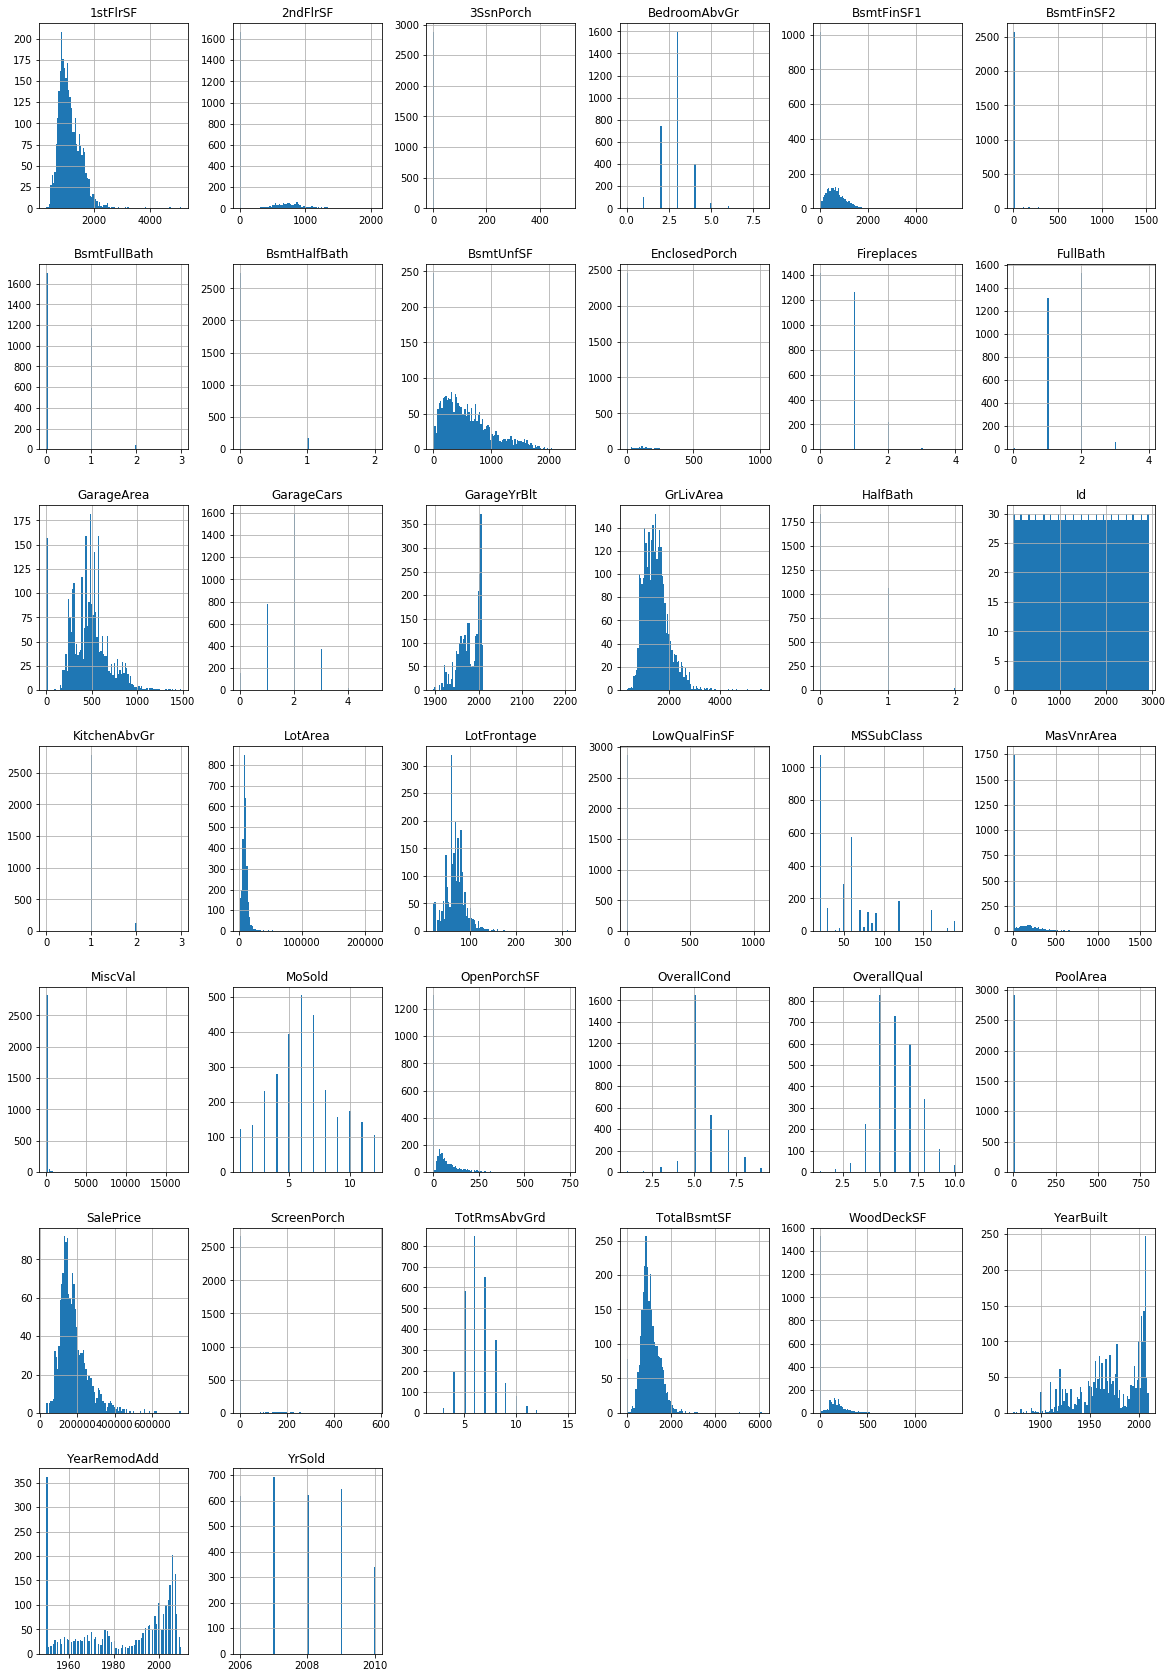

In [25]:
%matplotlib inline
df1.hist(bins=100, figsize=(20,30))
plt.show()

In [26]:
def getline(x, y, x2, y2, name_x, name_y):
    
    m, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    y_pred = m*x+b
    
    m2, b2, r_value2, p_value, std_err = scipy.stats.linregress(x2, y2)
    y_pred2 = m2*x2+b2
    
    plt.scatter(x, y)
    plt.scatter(x2, y2)
    plt.plot(x, y_pred, 'r')
    plt.plot(x2, y_pred2, 'g')
    plt.legend(['($r^2=$ {:.2f})'.format(r_value), 
                '($r_2^2=$ {:.2f})'.format(r_value2),
                'Raw',
                'Parsed'
               ],
            loc='best')
    
    plt.ylabel(name_y, fontsize=13)
    plt.xlabel(name_x, fontsize=13)
    plt.title(name_x +' vs '+ name_y)
    
    


In [27]:
abs(df1.corr()['SalePrice'].sort_values(ascending = False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2       0.011378
BsmtHalfBath     0.016844
MiscVal          0.021190
Id               0.021917
LowQualFinSF     0.025606
YrSold           0.028923
OverallCond      0.077856
MSSubClass       0.084284
EnclosedPorch    0.128578
KitchenAbvGr     0.135907
Name: SalePr

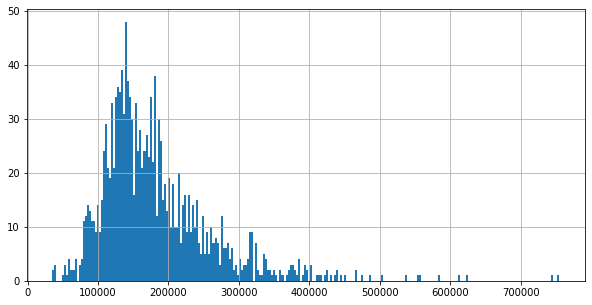

In [28]:
df1['SalePrice'].hist(bins=250, figsize=(10,5))

In [29]:
df1['SalePrice'] = np.log(df['SalePrice'])

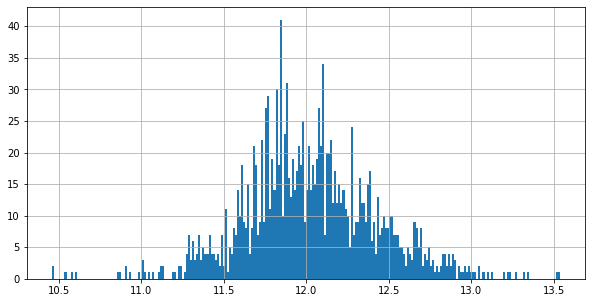

In [30]:
df1['SalePrice'].hist(bins=250, figsize=(10,5))

In [31]:
df1_parsed = df1

In [32]:
def plotcorr():

    df1temp = df1[:Trainingdatasize].select_dtypes(exclude=['object'])
    df1_parsedtemp = df1_parsed[:Trainingdatasize].select_dtypes(exclude=['object'])
    for elem in df1temp:
    
        plt.figure(figsize = (5,5))

        getline(df1temp[elem], df1temp['SalePrice'], df1_parsedtemp[elem], df1_parsedtemp['SalePrice'], str(elem), 'SalePrice')


df1_parsed = df1_parsed[df1_parsed['1stFlrSF'] < 3000][:Trainingdatasize]
df1_parsed = df1_parsed[df1_parsed['LotArea'] < 100000][:Trainingdatasize]
df1_parsed = df1_parsed[df1_parsed['GarageArea'] < 1200][:Trainingdatasize]
df1_parsed = df1_parsed[df1_parsed['LotFrontage'] < 300][:Trainingdatasize]


In [33]:
df1_parsed['LotFrontage'] = df1_parsed['LotFrontage'].fillna(df1_parsed['LotFrontage'].median())
df1_parsed['GarageYrBlt'] = df1_parsed['GarageYrBlt'].fillna(df1_parsed['GarageYrBlt'].median())
df1_parsed['MasVnrArea'] = df1_parsed['MasVnrArea'].fillna(df1_parsed['MasVnrArea'].median())
df1_parsed['BsmtFinSF1'] = df1_parsed['BsmtFinSF1'].fillna(df1_parsed['BsmtFinSF1'].median())
df1_parsed['BsmtFinSF2'] = df1_parsed['BsmtFinSF2'].fillna(df1_parsed['BsmtFinSF2'].median())
df1_parsed['BsmtFullBath'] = df1_parsed['BsmtFullBath'].fillna(df1_parsed['BsmtFullBath'].median())
df1_parsed['BsmtHalfBath'] = df1_parsed['BsmtHalfBath'].fillna(df1_parsed['BsmtHalfBath'].median())
df1_parsed['BsmtUnfSF'] = df1_parsed['BsmtUnfSF'].fillna(df1_parsed['BsmtUnfSF'].median())
df1_parsed['GarageArea'] = df1_parsed['GarageArea'].fillna(df1_parsed['GarageArea'].median())
df1_parsed['GarageCars'] = df1_parsed['GarageCars'].fillna(df1_parsed['GarageCars'].median())
df1_parsed['TotalBsmtSF'] = df1_parsed['TotalBsmtSF'].fillna(df1_parsed['TotalBsmtSF'].median())
df1_parsed['GarageYrBlt'] = df1_parsed['GarageYrBlt'].fillna(df1_parsed['GarageYrBlt'].median())
df1_parsed['SalePrice'] = df1_parsed['SalePrice'].fillna(df1_parsed['SalePrice'].median())

In [34]:
for elem in df1_parsed.select_dtypes(exclude=['object']):
    print(elem, df1_parsed[elem].isnull().sum())

1stFlrSF 0
2ndFlrSF 0
3SsnPorch 0
BedroomAbvGr 0
BsmtFinSF1 0
BsmtFinSF2 0
BsmtFullBath 0
BsmtHalfBath 0
BsmtUnfSF 0
EnclosedPorch 0
Fireplaces 0
FullBath 0
GarageArea 0
GarageCars 0
GarageYrBlt 0
GrLivArea 0
HalfBath 0
Id 0
KitchenAbvGr 0
LotArea 0
LotFrontage 0
LowQualFinSF 0
MSSubClass 0
MasVnrArea 0
MiscVal 0
MoSold 0
OpenPorchSF 0
OverallCond 0
OverallQual 0
PoolArea 0
SalePrice 0
ScreenPorch 0
TotRmsAbvGrd 0
TotalBsmtSF 0
WoodDeckSF 0
YearBuilt 0
YearRemodAdd 0
YrSold 0


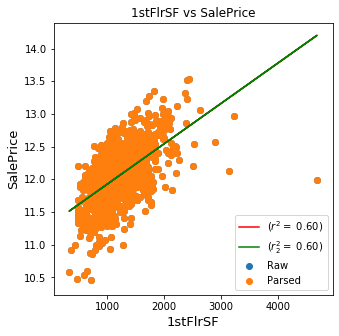

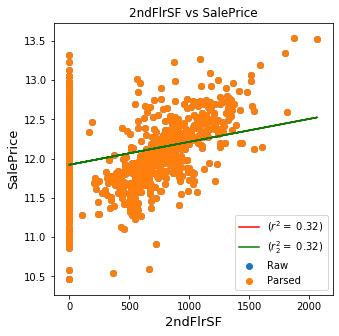

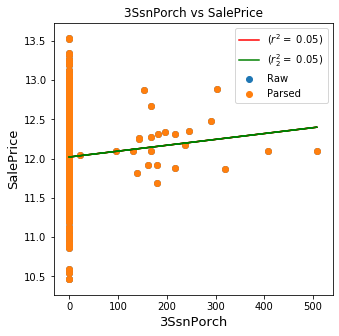

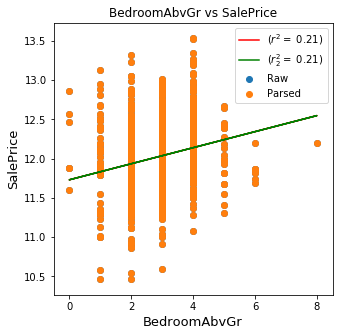

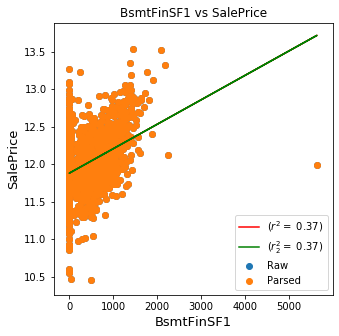

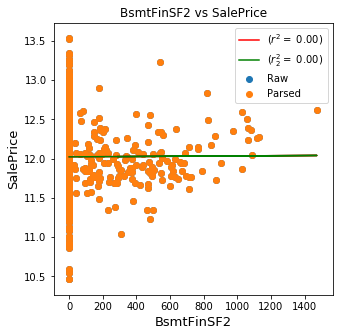

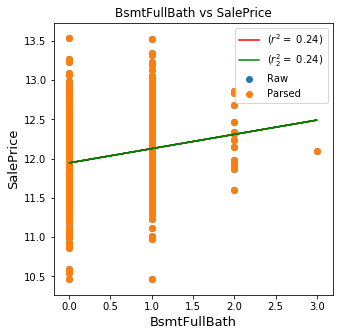

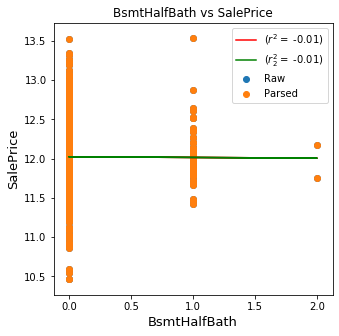

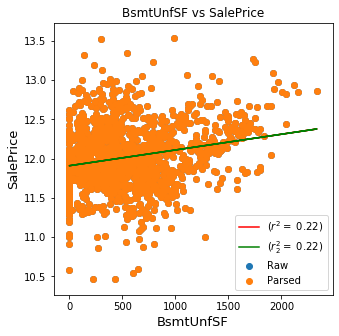

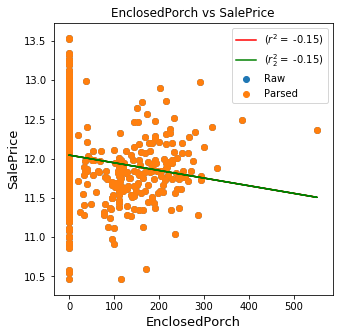

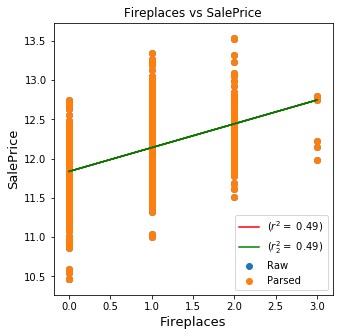

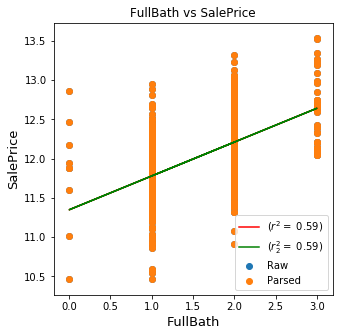

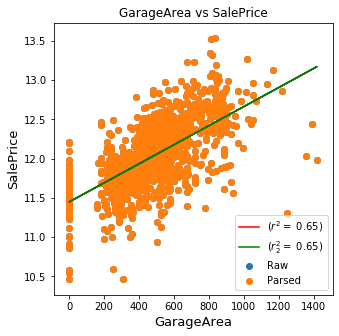

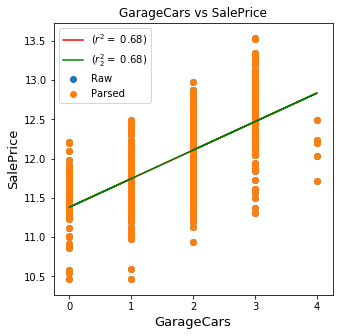

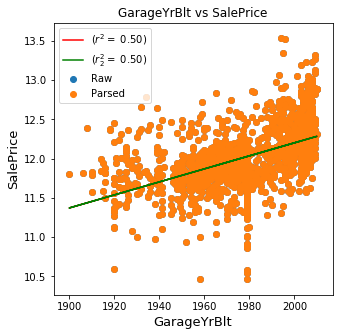

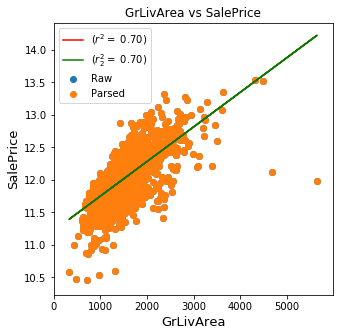

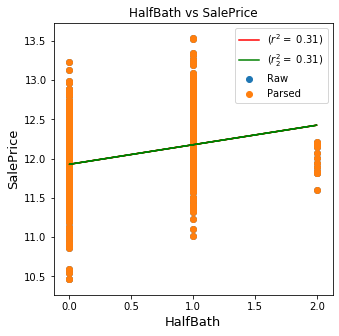

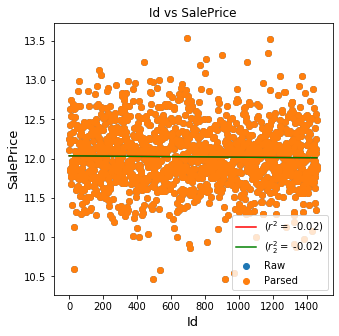

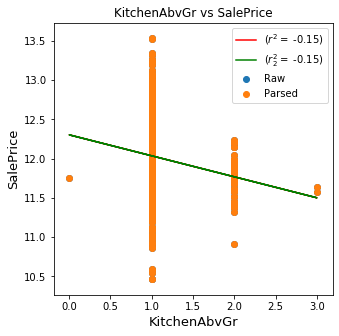

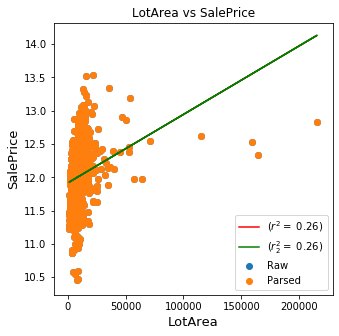

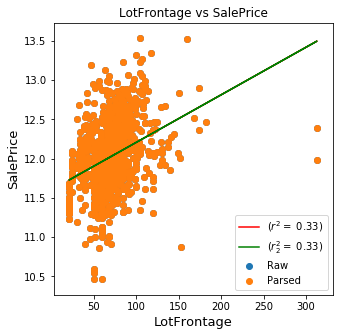

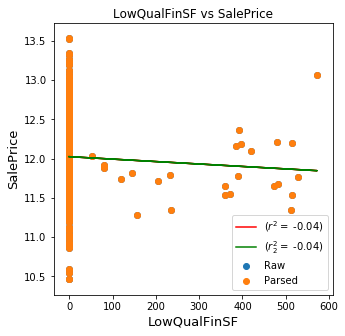

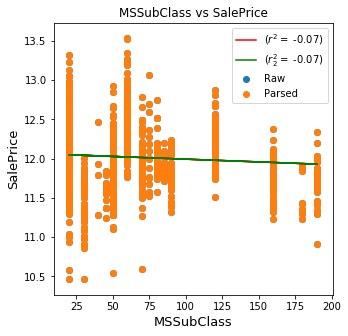

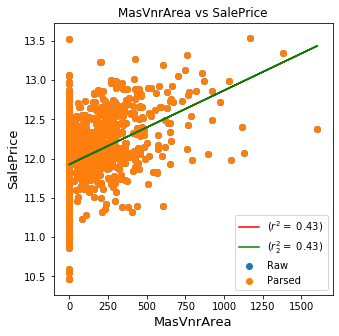

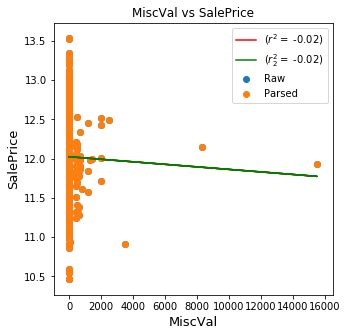

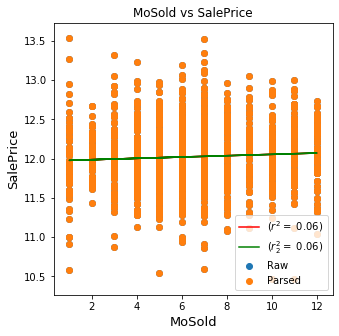

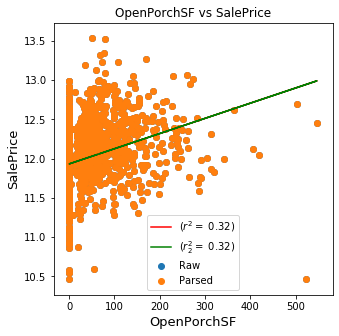

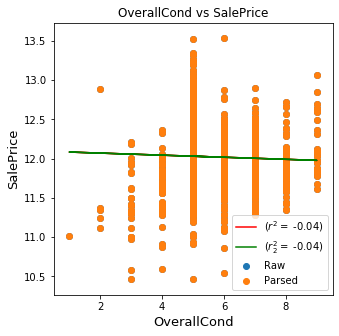

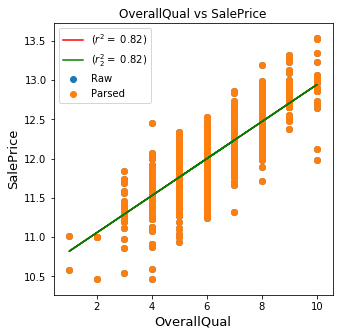

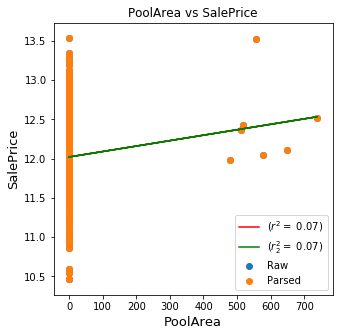

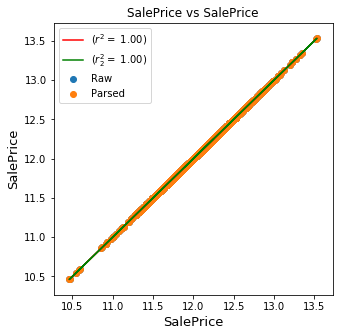

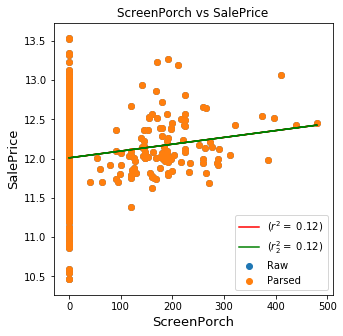

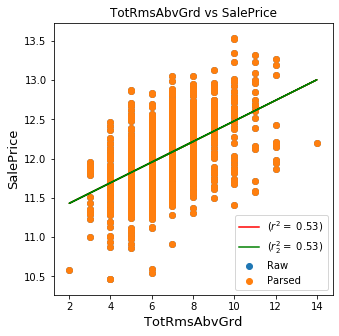

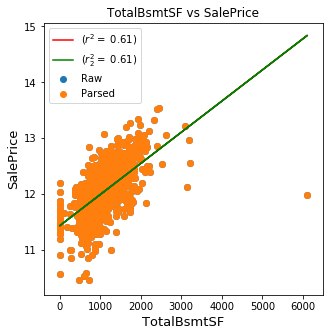

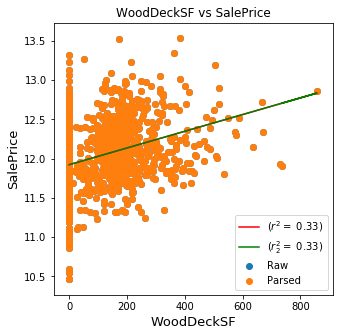

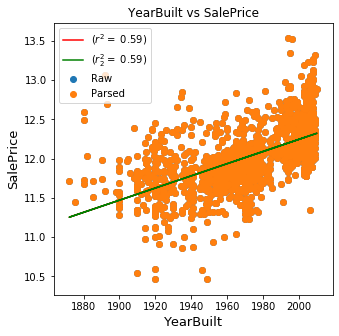

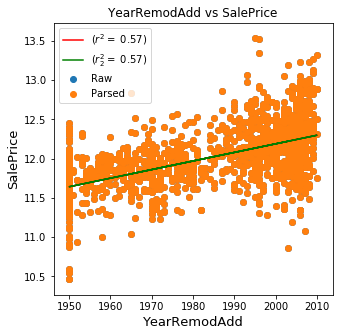

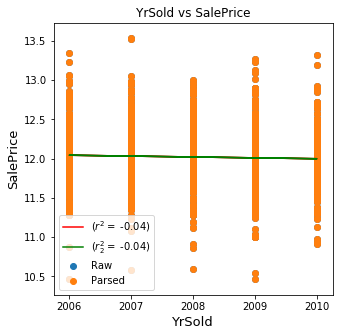

In [35]:
plotcorr()

In [36]:
df1_parsed['LotArea'] = np.log(df1_parsed['LotArea'])

In [37]:
df1_parsed.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [38]:
#2ndFlrSF, 3SsnPorch, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, EnclosedPorch, GarageArea, MasVnrArea, OpenPorchSF, ScreenPorch, TotalBsmtSF WoodDeckSF, YearRemodAdd

In [39]:
abs(df1_parsed.corr()['SalePrice'].sort_values(ascending = False))

SalePrice        1.000000
OverallQual      0.566630
GrLivArea        0.515409
GarageCars       0.471952
GarageArea       0.456583
TotalBsmtSF      0.431063
FullBath         0.418459
1stFlrSF         0.415896
YearBuilt        0.413167
YearRemodAdd     0.396014
TotRmsAbvGrd     0.392755
Fireplaces       0.346016
GarageYrBlt      0.340721
MasVnrArea       0.305084
LotArea          0.287962
BsmtFinSF1       0.263372
LotFrontage      0.245343
WoodDeckSF       0.234034
2ndFlrSF         0.230697
HalfBath         0.222055
OpenPorchSF      0.221921
BsmtFullBath     0.164745
BsmtUnfSF        0.158287
BedroomAbvGr     0.146758
ScreenPorch      0.084277
PoolArea         0.056124
3SsnPorch        0.046427
MoSold           0.041939
BsmtFinSF2       0.002544
BsmtHalfBath     0.004152
MiscVal          0.012885
OverallCond      0.025655
YrSold           0.025892
LowQualFinSF     0.027120
Id               0.040883
MSSubClass       0.052214
EnclosedPorch    0.100899
KitchenAbvGr     0.106726
Name: SalePr

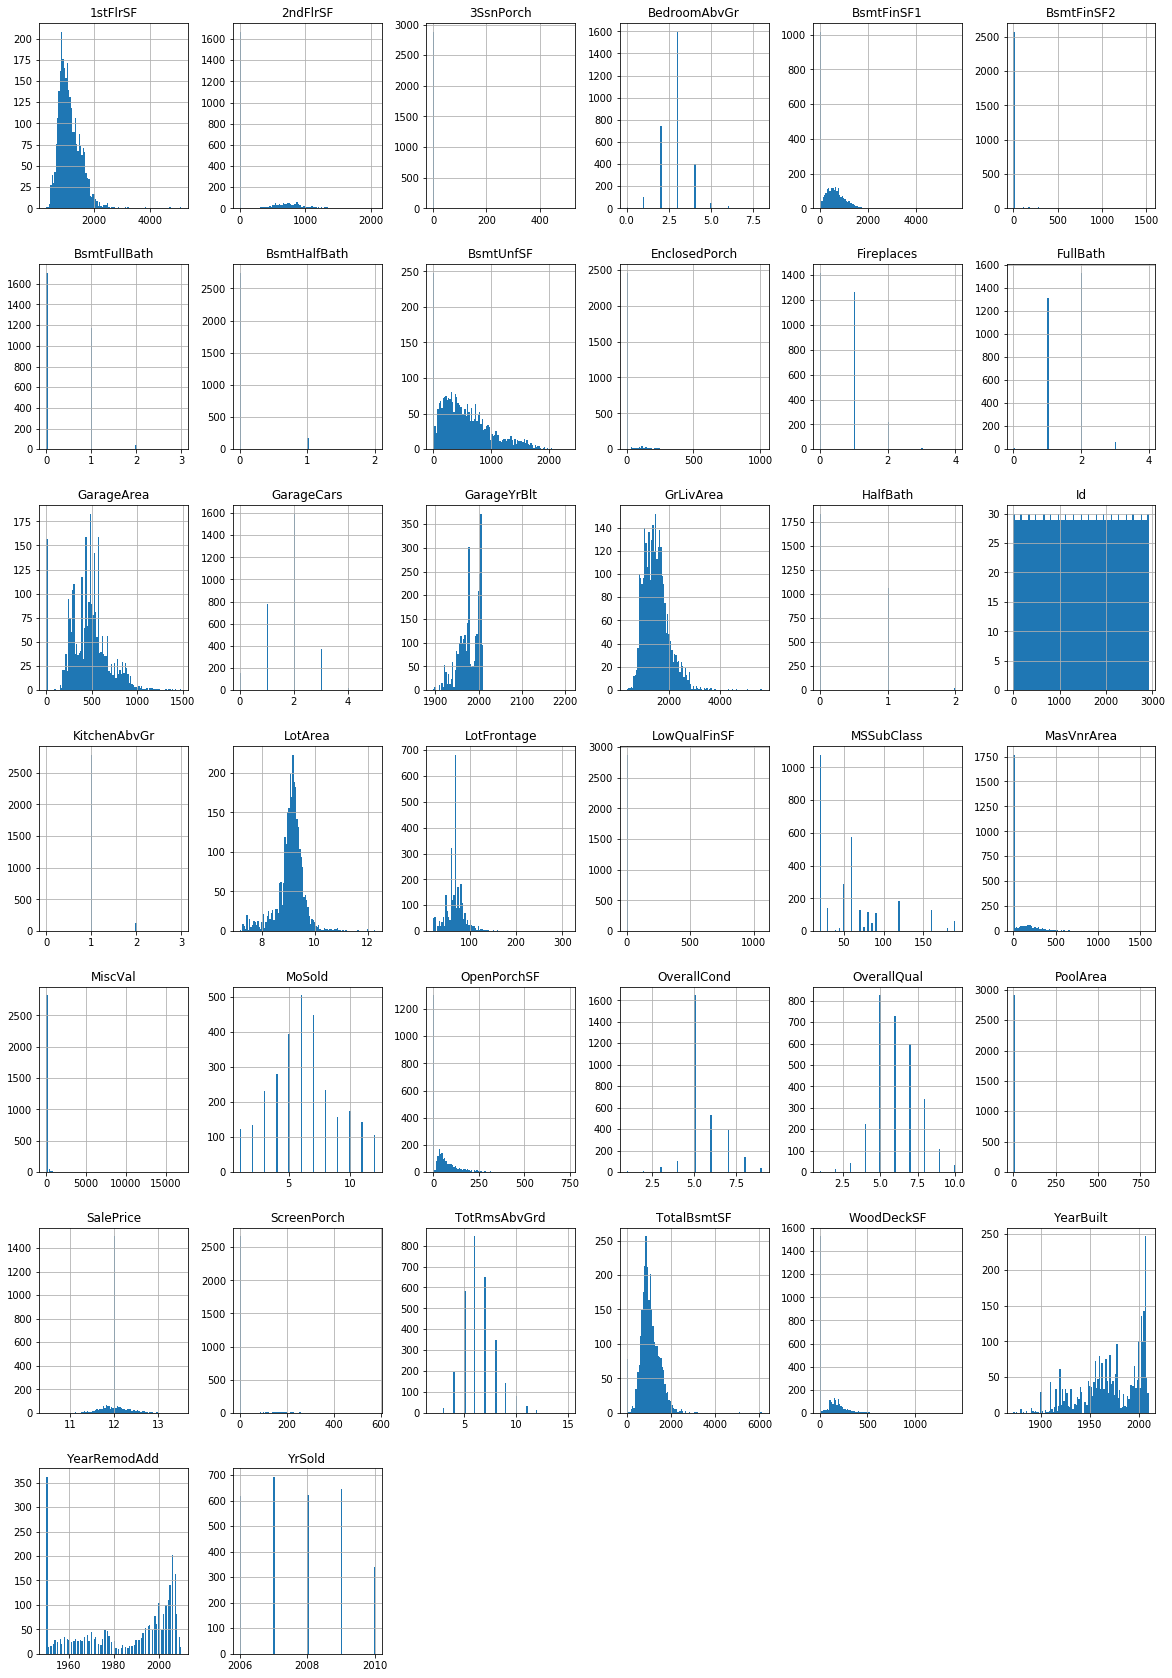

In [40]:
%matplotlib inline
df1_parsed.hist(bins=100, figsize=(20,30))
plt.show()

In [41]:
df1_parsed[df1_parsed.duplicated() ==  True]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold


In [42]:
df1_parsed = df1_parsed.drop_duplicates()

In [43]:
df1_parsed = df1_parsed.drop(['MiscFeature'], axis = 1)

In [44]:
df1_parsed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [45]:
df1_parsed['Alley'] = df1_parsed['Alley'].fillna('No Alley Access')
df1_parsed['Fence'] = df1_parsed['Fence'].fillna('No Fence')
df1_parsed['BsmtCond'] = df1_parsed['BsmtCond'].fillna('No Basement')
df1_parsed['BsmtExposure'] = df1_parsed['BsmtExposure'].fillna('No Basement')
df1_parsed['BsmtFinType1'] = df1_parsed['BsmtFinType1'].fillna('No Basement')
df1_parsed['BsmtFinType2'] = df1_parsed['BsmtFinType2'].fillna('No Basement')
df1_parsed['BsmtQual'] = df1_parsed['BsmtQual'].fillna('No Basement')
df1_parsed['GarageCond'] = df1_parsed['GarageCond'].fillna('No Garage')
df1_parsed['GarageFinish'] = df1_parsed['GarageFinish'].fillna('No Garage')
df1_parsed['GarageQual'] = df1_parsed['GarageQual'].fillna('No Garage')
df1_parsed['GarageType'] = df1_parsed['GarageType'].fillna('No Garage')
df1_parsed['PoolQC'] = df1_parsed['PoolQC'].fillna('No Pool')
df1_parsed['FireplaceQu'] = df1_parsed['FireplaceQu'].fillna('No Fireplace')

In [46]:
for column in df1_parsed:
    try:
        df1_parsed[column] = df1_parsed[column].fillna(df1_parsed[column].value_counts()[0])
    except:
        pass

In [47]:
df1_parsed.isnull().sum().sum()

0

In [48]:
#Replacing MSSubClass
MSSubClassin = [20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190]
MSSubClassout = ['1-STORY 1946 & NEWER ALL STYLES', '1-STORY 1945 & OLDER', '1-STORY W/FINISHED ATTIC ALL AGES', '1-1/2 STORY - UNFINISHED ALL AGES',
            '1-1/2 STORY FINISHED ALL AGES', '2-STORY 1946 & NEWER', '2-STORY 1945 & OLDER', '2-1/2 STORY ALL AGES', 'SPLIT OR MULTI-LEVEL',
             'SPLIT FOYER', 'DUPLEX - ALL STYLES AND AGES', '1-STORY PUD (Planned Unit Development) - 1946 & NEWER', '1-1/2 STORY PUD - ALL AGES',
              '2-STORY PUD - 1946 & NEWER', 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', '2 FAMILY CONVERSION - ALL STYLES AND AGES']

In [49]:
df1_parsed.isnull().sum()

1stFlrSF        0
2ndFlrSF        0
3SsnPorch       0
Alley           0
BedroomAbvGr    0
               ..
Utilities       0
WoodDeckSF      0
YearBuilt       0
YearRemodAdd    0
YrSold          0
Length: 80, dtype: int64

In [50]:
df1_parsed['2ndFlrSF_bool'] = (df1_parsed['2ndFlrSF'] > 0) & 1
df1_parsed['3SsnPorch_bool'] = (df1_parsed['3SsnPorch'] > 0) & 1
df1_parsed['BsmtFinSF1_bool'] = (df1_parsed['BsmtFinSF1'] > 0) & 1
df1_parsed['BsmtFinSF2_bool'] = (df1_parsed['BsmtFinSF2'] > 0) & 1
df1_parsed['BsmtUnfSF_bool'] = (df1_parsed['BsmtUnfSF'] > 0) & 1
df1_parsed['EnclosedPorch_bool'] = (df1_parsed['EnclosedPorch'] > 0) & 1
df1_parsed['GarageArea_bool'] = (df1_parsed['GarageArea'] > 0) & 1
df1_parsed['MasVnrArea_bool'] = (df1_parsed['MasVnrArea'] > 0) & 1
df1_parsed['OpenPorchSF_bool'] = (df1_parsed['OpenPorchSF'] > 0) & 1
df1_parsed['ScreenPorch_bool'] = (df1_parsed['ScreenPorch'] > 0) & 1
df1_parsed['TotalBsmtSF_bool'] = (df1_parsed['TotalBsmtSF'] > 0) & 1
df1_parsed['WoodDeckSF_bool'] = (df1_parsed['WoodDeckSF'] > 0) & 1
df1_parsed['YearRemodAdd_bool'] = (df1_parsed['YearRemodAdd'] > 0) & 1

In [51]:
df1_parsed = pd.get_dummies(df1_parsed, drop_first=True)

In [52]:
df1_parsed.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,0,1,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,0,1,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,0,1,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,0,1,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,0,1,1,1,0


In [53]:
df1_parsed.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BsmtFinSF1          0
                   ..
SaleType_Oth        0
SaleType_WD         0
Street_Pave         0
Utilities_AllPub    0
Utilities_NoSeWa    0
Length: 279, dtype: int64

In [54]:
df1_parsed.shape

(2919, 279)

In [55]:
abs(df1_parsed.corr()['SalePrice'].sort_values(ascending = False))

SalePrice                   1.000000
OverallQual                 0.566630
GrLivArea                   0.515409
GarageCars                  0.471952
GarageArea                  0.456583
                              ...   
BsmtQual_TA                 0.337506
FireplaceQu_No Fireplace    0.361115
KitchenQual_TA              0.381054
ExterQual_TA                0.419747
YearRemodAdd_bool                NaN
Name: SalePrice, Length: 279, dtype: float64

In [56]:
#df1_parsed = df1_parsed.drop(['Condition2_PosN', 'Functional_Sev', 'RoofStyle_Shed', 'Utilities_AllPub', 'OverallCond', 'KitchenAbvGr'], axis=1)

In [57]:
#df1 = df1.drop('MSSubClass_1-1/2 STORY PUD - ALL AGES',axis=1)

In [58]:
new_train = df1_parsed[:Trainingdatasize]
new_test = df1_parsed[Trainingdatasize:]

In [59]:
new_test.isnull().sum().sum()

0

In [60]:
new_train.isnull().sum().sum()

0

In [61]:
new_train = new_train.drop(['Id'], axis=1)
test_id = new_test['Id']
new_test = new_test.drop(['Id'], axis=1)

In [62]:
new_test.shape

(1459, 278)

In [63]:
new_train.shape

(1460, 278)

In [64]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd


def OptimalRegression(dataset, y_name):
    
    r = Ridge()
    l = Lasso()
    e = ElasticNet()
    et = ExtraTreeRegressor()
    gbr = GradientBoostingRegressor()
    
    x = dataset.drop(y_name,axis = 1) 
    y = dataset[y_name]
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=0)
    
    algos = [r, l, e, et, gbr]
    algo_names = ['Ridge', 'Lasso','ElasticNet','Extra Tree','Gradient Boost']
    
    result = pd.DataFrame(columns = ['Mean Squared Error', 'R2'], index = algo_names)
    
    meansquarederror = []
    r2 = []
    largest_r2 = 0
    bestmodel = 0
    
    for algo in algos:
        algo.fit(x_train,y_train)
        algo.predict(x_test)
        
        meansquarederror.append(mean_squared_error(y_test, algo.predict(x_test)))
        r2val = r2_score(y_test, algo.predict(x_test))
        r2.append(r2val)
        if(r2val > largest_r2):
            largest_r2 = r2val
            bestmodel = algo
        
    result['Mean Squared Error'] = meansquarederror
    result['R2'] = r2
    
    stats = result.sort_values('R2', ascending = False)
    
    return bestmodel, stats



In [65]:
def plot_learn_curves(model, dataset, y_name):
    
    x = dataset.drop(y_name,axis = 1) 
    y = dataset[y_name]
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=0)
    train_errors = []
    val_errors = []
    r2_val = []
    
    for i in range(1,len(x_train)):
        model.fit(x_train[:i],y_train[:i])
        y_train_predict = model.predict(x_train[:i])
        y_val_predict = model.predict(x_test)
        train_errors.append(mean_squared_error(y_train[:i], y_train_predict))
        val_errors.append(mean_squared_error(y_test, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="predict")
    plt.ylabel("RMSE", fontsize=13)
    plt.xlabel("Training Set Size", fontsize=13)
    plt.legend(['Training Set','Predicted Set'],loc='best')

In [66]:
model, stats = OptimalRegression(new_train,'SalePrice')
stats

,Mean Squared Error,R2
Gradient Boost,0.016867,0.888590
Ridge,0.042012,0.722509
Extra Tree,0.054083,0.642778
ElasticNet,0.064688,0.572736
Lasso,0.070208,0.536274


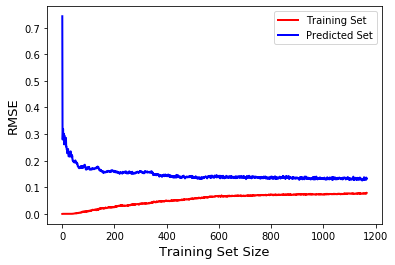

In [67]:
plot_learn_curves(GradientBoostingRegressor(), new_train, 'SalePrice')

In [68]:
new_test['SalePrice'] = model.predict(new_test.drop('SalePrice', axis=1))

In [69]:
new_test['SalePrice'] = np.exp(new_test['SalePrice'])

In [70]:
out_df = pd.concat([test_id, new_test['SalePrice']], axis=1)

In [71]:
#out_df = new_test[['Id','SalePrice']]

In [72]:
out_df.head(10)

,Id,SalePrice
0,1461,122468.869346
1,1462,155720.574643
2,1463,182680.820317
3,1464,189037.372259
4,1465,195174.440849
5,1466,176125.500305
6,1467,172938.202784
7,1468,164395.513181
8,1469,194768.868660
9,1470,123384.597012


In [73]:
out_df.to_csv("My_Prediction.csv",index = False)

In [74]:
ls

1533148642_test.csv
1533148642_train.csv
HackDay2.ipynb
My_Prediction.csv
README.md
data_description.txt*
house-prices-advanced-regression-techniques/
house-prices-advanced-regression-techniques.zip
sample_submission.csv*
sols/


In [75]:
out_df.shape

(1459, 2)